<a href="https://colab.research.google.com/github/Aftabgazali/Heart-Disease-Classification/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring the dataset

In [ ]:
df.shape

(303, 14)

## Plotting some Graphs

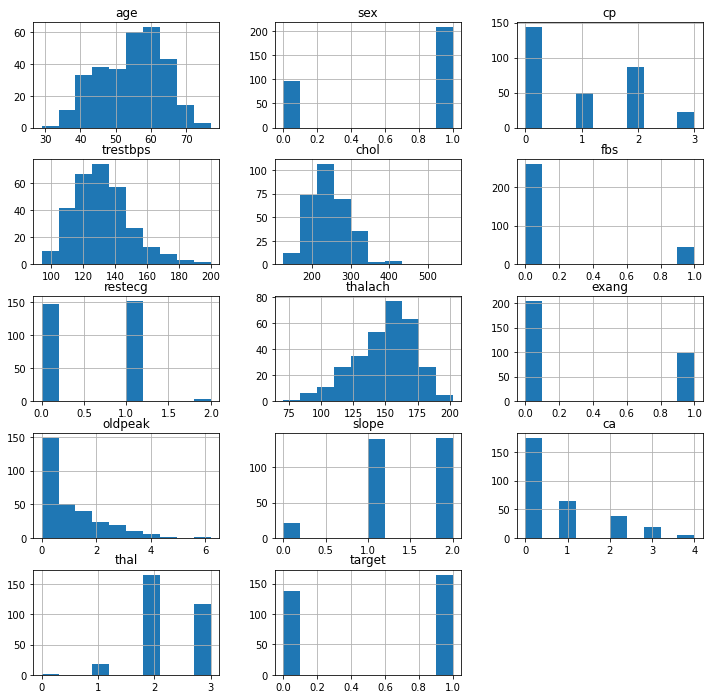

In [ ]:
df.hist(figsize=(12,12),layout=(5,3))
plt.show()

## Outlier Detection Using Box and Whisker Plot

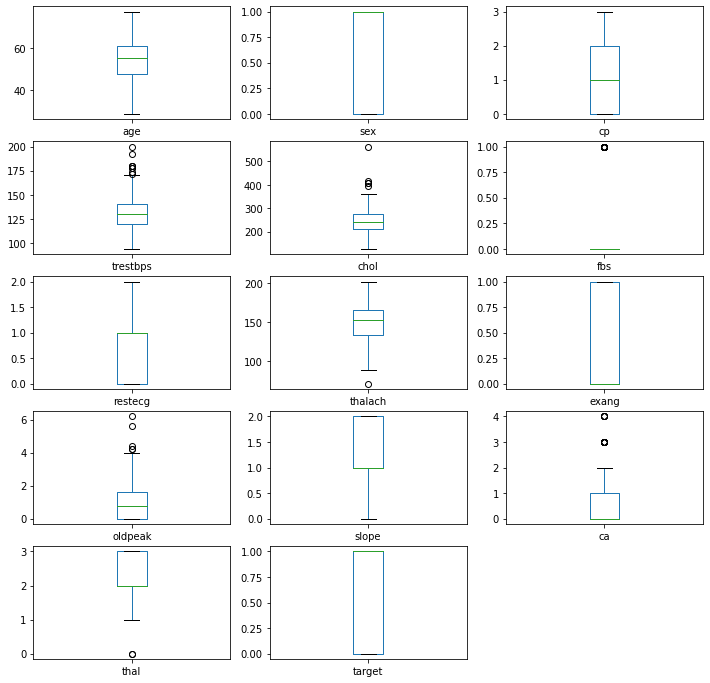

In [ ]:
df.plot(kind='box',subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

## We've Outliers in trestbps,chol,ca,oldpeak

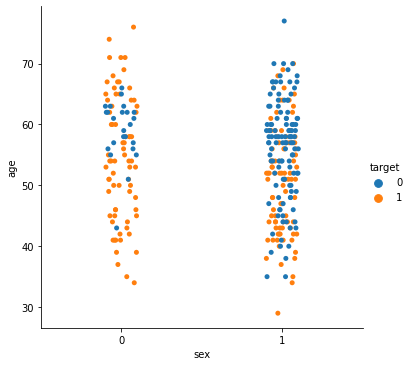

In [ ]:
sb.catplot(data=df, x='sex',y='age',hue='target')
plt.show()

In [ ]:
## This plot shows that men having age greater than 70 do not have any heart disease which is clearly an outlier

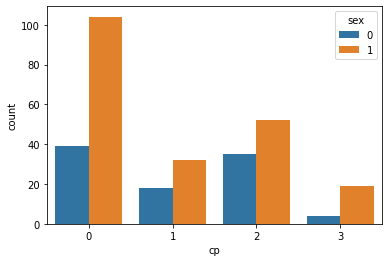

In [ ]:
sb.countplot(x='cp',hue='sex',data=df)

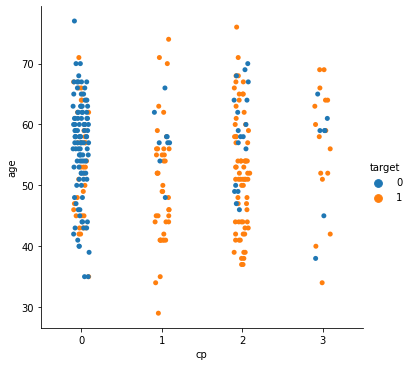

In [ ]:
sb.catplot(x='cp',y='age',hue='target',data=df)

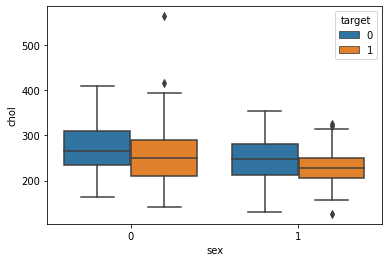

In [ ]:
sb.boxplot(x='sex',y='chol',hue='target',data=df)

## Here we can conclude that in both sex having heart disease in cholestrol has outliers

## Outlier Removal 

In [ ]:
## This is an Outlier since As Age is high the chance of having heart disease is also high
df=df[~((df['age']>=70) & (df['target']==0))]

In [ ]:
df.shape

(299, 14)

In [ ]:
df=df[~((df['age']<40) & (df['cp']==1) & (df['target']==1))]

In [ ]:
df.shape

(296, 14)

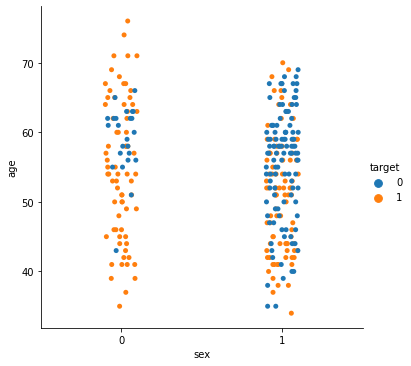

In [ ]:
sb.catplot(data=df, x='sex',y='age',hue='target')
plt.show()

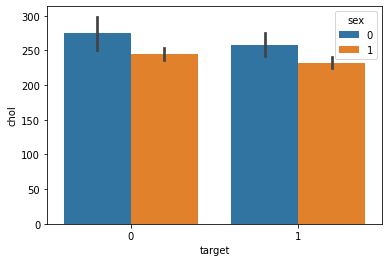

In [ ]:
sb.barplot(data=df,x='target',y='chol',hue='sex')

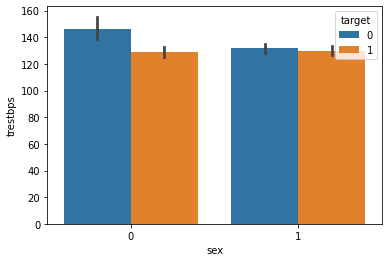

In [ ]:
sb.barplot(data=df,x='sex',y='trestbps',hue='target')

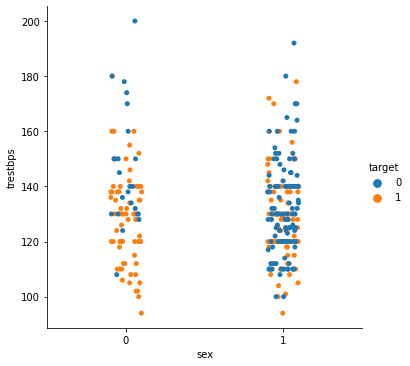

In [ ]:
sb.catplot(data=df,x='sex',y='trestbps',hue='target')

In [ ]:
df=df[~((df['trestbps']>=162) & (df['target']==1))]
df=df[~((df['trestbps']>=180) & (df['target']==0))]

In [ ]:
df.shape

(288, 14)

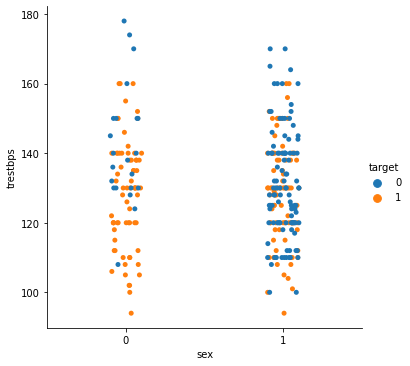

In [ ]:
sb.catplot(data=df,x='sex',y='trestbps',hue='target')

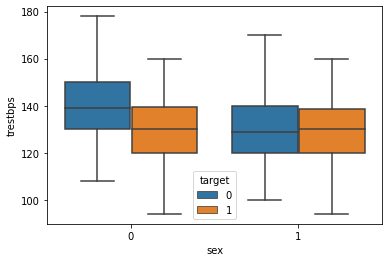

In [ ]:
sb.boxplot(x='sex',y='trestbps',hue='target',data=df)

In [ ]:
df.shape

(286, 14)

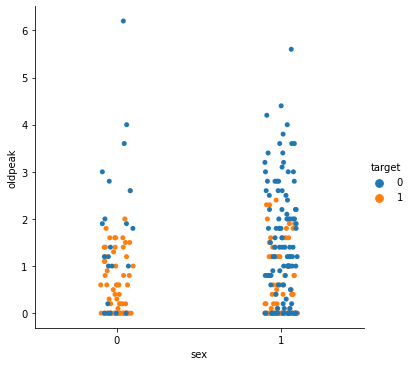

In [ ]:
sb.catplot(x='sex',y='oldpeak',hue='target',data=df)

In [ ]:
df=df[~((df['oldpeak']>=3) & (df['target']==1))]

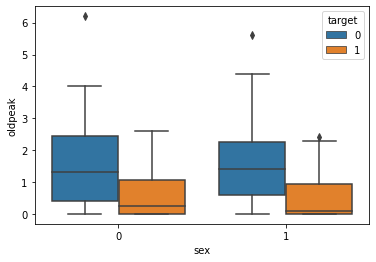

In [ ]:
sb.boxplot(x='sex',y='oldpeak',hue='target',data=df)

## Defining X and y

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

## Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Testing Using Different Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier(criterion='entropy')
reg.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
reg.score(X_test,y_test)

0.8103448275862069

In [ ]:
from sklearn.ensemble import RandomForestClassifier
reg1=RandomForestClassifier(criterion='entropy', n_estimators=120)
reg1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
reg1.score(X_test,y_test)

0.9137931034482759

In [ ]:
from sklearn.svm import SVC
reg2=SVC(C=2.0)
reg2.fit(X_train,y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
reg2.score(X_test,y_test)

0.9137931034482759